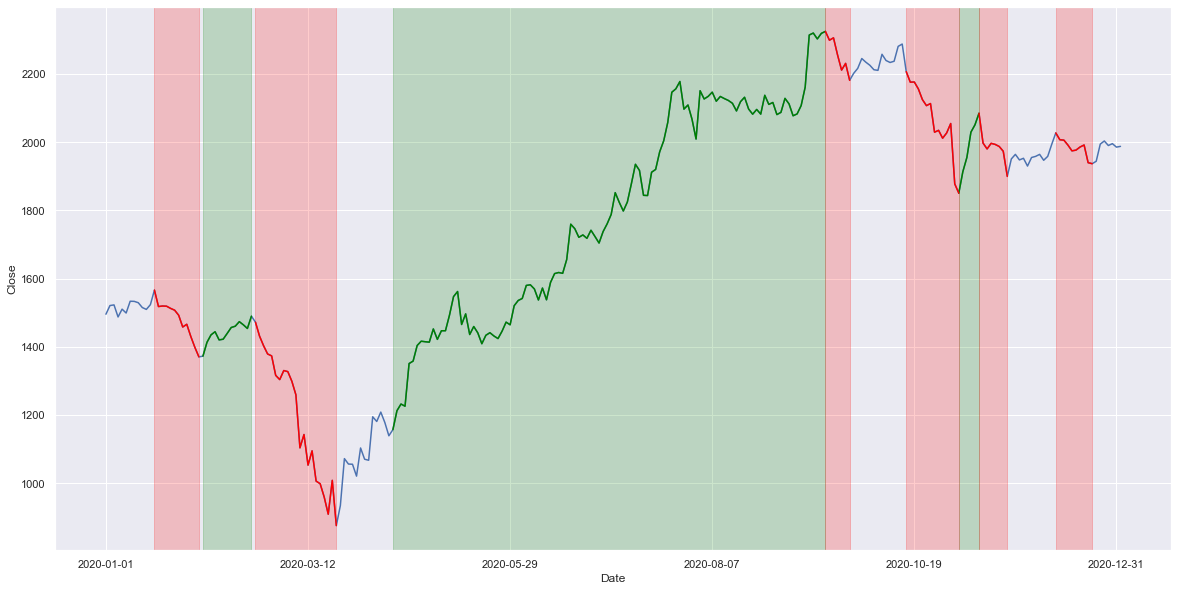

In [3]:
import trendet

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

df = trendet.identify_all_trends(stock='RELI',
                                 country='india',
                                 from_date='01/01/2020',
                                 to_date='01/01/2021',
                                 window_size=5,
                                 identify='both')

df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Date')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = df['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(df['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()
